In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from faker import Faker
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import rcParams
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import random

In [115]:
fake = Faker()
rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"
planet_gravity = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}
 
L = []
t = []
def aument():
    f=(round(random.uniform(1,2), 2)) #longitud
    x=(round(random.uniform(0.46,0.66), 2)) #tiempo
    g = round((2*f)/(x**2), 2) 
    if g>10.4 or g<9.3:
        aument()
    else:
        t.append(x)
        L.append(f)
        
for i in range(100):
    aument()
grav_calculada = [round((2*L[i])/(t[i]**2), 2) for i in range(len(L))] #gravedad


 
    
df = pd.DataFrame({
    "Longitud": L,
    "Tiempo": t,
    "Gravedad Calculada": grav_calculada
})

print(df.head(100))
print(df.describe())

    Longitud  Tiempo  Gravedad Calculada
0       1.04    0.46                9.83
1       1.62    0.57                9.97
2       1.23    0.51                9.46
3       1.47    0.54               10.08
4       1.21    0.50                9.68
..       ...     ...                 ...
95      1.20    0.50                9.60
96      1.79    0.59               10.28
97      1.59    0.57                9.79
98      1.51    0.54               10.36
99      1.70    0.60                9.44

[100 rows x 3 columns]
        Longitud      Tiempo  Gravedad Calculada
count  100.00000  100.000000           100.00000
mean     1.53550    0.556400             9.83360
std      0.29115    0.053343             0.31192
min      1.04000    0.460000             9.30000
25%      1.25750    0.510000             9.59000
50%      1.52000    0.560000             9.88500
75%      1.81250    0.602500            10.05250
max      1.99000    0.640000            10.40000


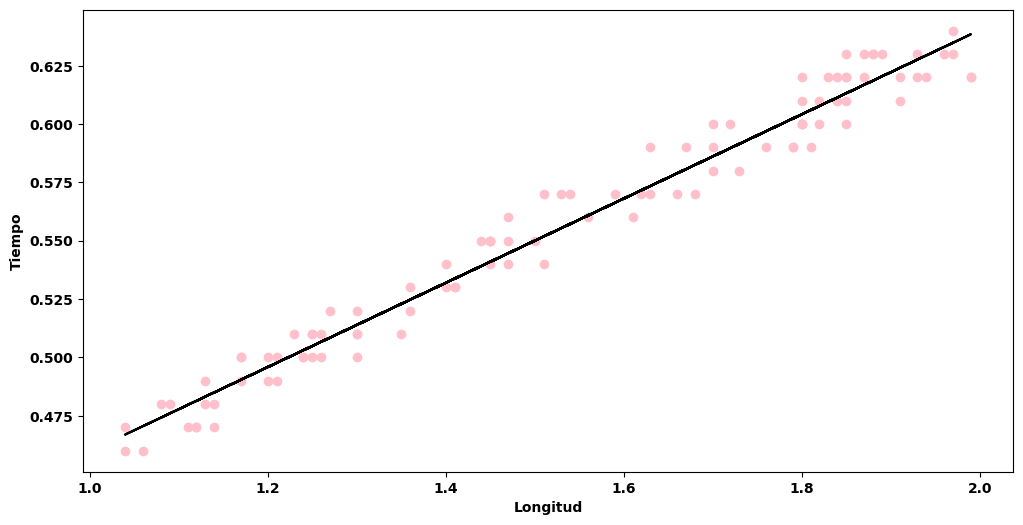

In [139]:
X= df["Longitud"].values.reshape(-1,1) #creamos el eje x donde values conviertelos valores de esa columna en un array de numpy
y = df["Tiempo"].values.reshape(-1,1) #despues, reshape convierte el array en en una matriz de 1 columna y el -1 es las filas que el crea convenuente

model=LinearRegression()
model.fit(X,y)#ajustamos la regresion lineal a los datos
y_pred = model.predict(X)#predice el modelo de la variable "x"
plt.scatter(X,y, color="pink")#creamos los puntos
plt.plot(X,y_pred, color="black")#creamos la recta
plt.xlabel("Longitud")#ponemos lo q pondra en el eje x
plt.ylabel("Tiempo")#lo mismo con el y
plt.show()

<AxesSubplot:>

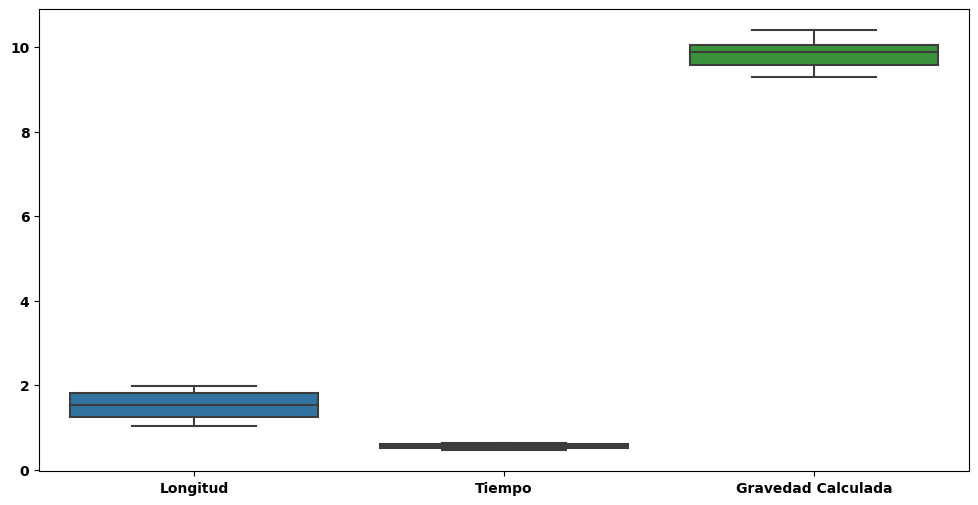

In [117]:
sns.boxplot(data=df,  orient='v')

<AxesSubplot:>

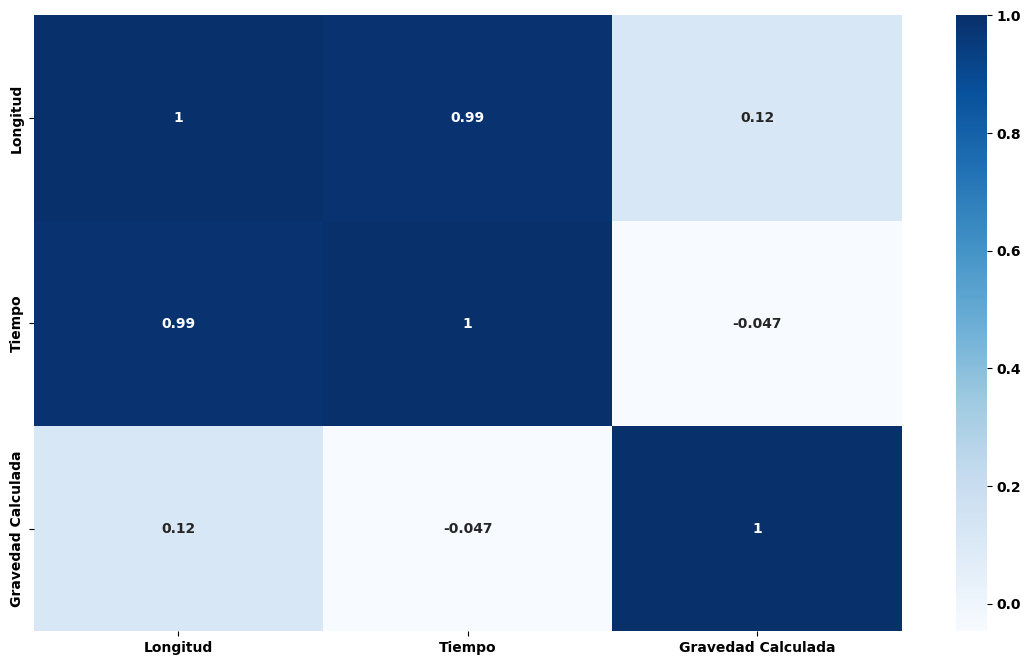

In [124]:
df_corr = df.corr()
plt.figure(figsize = (14,8))
sns.heatmap(df_corr, cmap='Blues', annot = True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<AxesSubplot:>

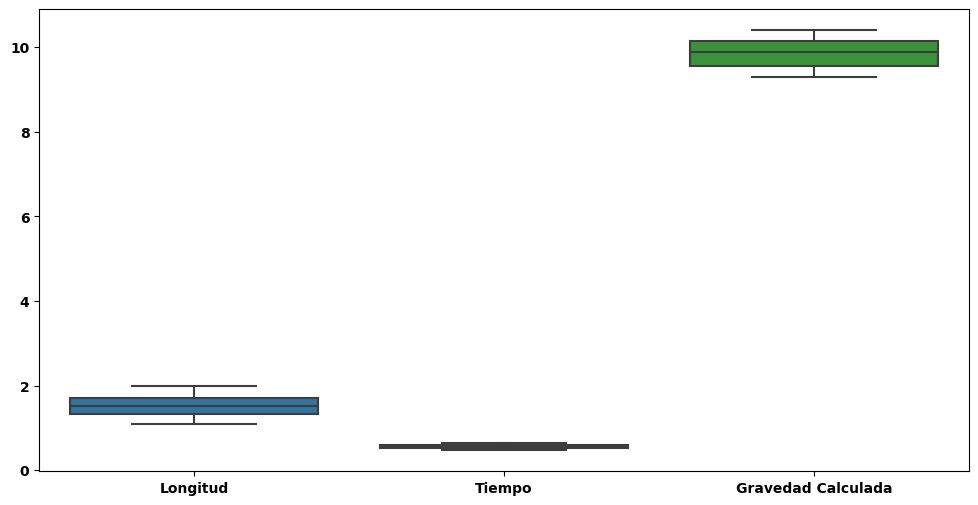

In [86]:
sns.boxplot(data=df,  orient='v')

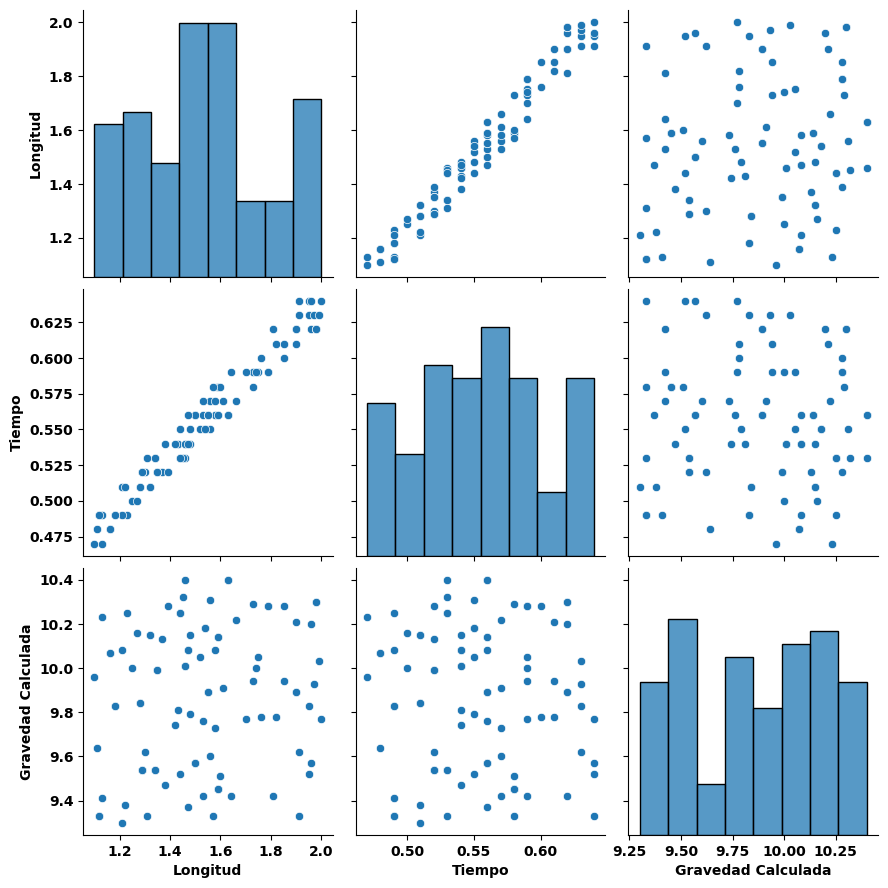

In [87]:
sns.pairplot(data=df, height=3)
plt.show()

LinearRegression()


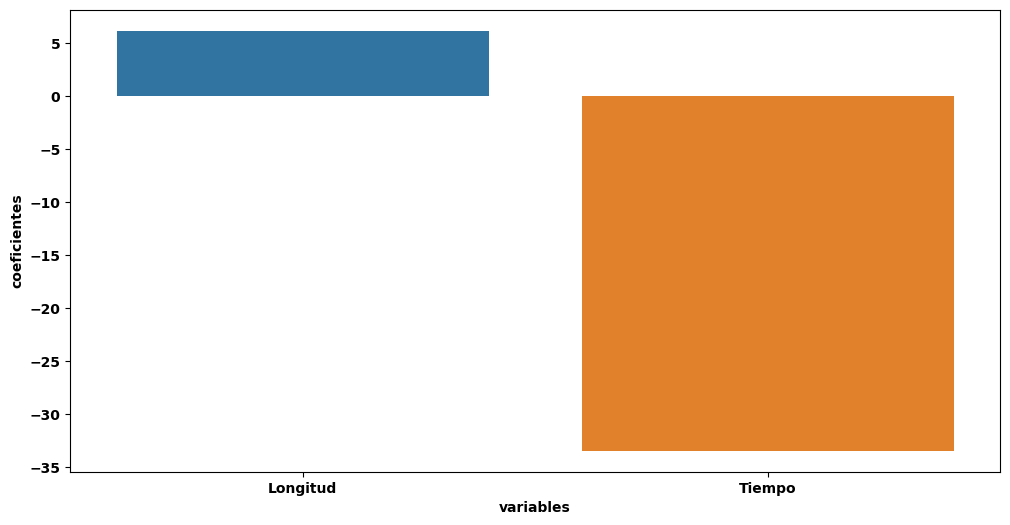

In [138]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1_long = df['Longitud'].quantile(0.25)
Q3_long = df['Longitud'].quantile(0.75)
Q1_time = df['Tiempo'].quantile(0.25)
Q3_time = df['Tiempo'].quantile(0.75)

# IQR es el rango intercuartil 
IQR_long = Q3_long - Q1_long
IQR_time = Q3_time- Q1_time


X_multiple = df.drop(['Gravedad Calculada'], axis='columns')
y_multiple = df['Gravedad Calculada']


X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)
mod_lin_reg= LinearRegression() 
mod_lin_reg.fit(X_train,y_train)
mod_lr_predict=mod_lin_reg.predict(X_test)
print(mod_lin_reg)
df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_lin_reg.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()




80     9.78
47     9.73
74     9.67
46     9.52
18    10.02
      ...  
86     9.56
66    10.00
14     9.77
45     9.62
6     10.09
Name: Gravedad Calculada, Length: 80, dtype: float64
El mejor valor de n_estimator podría ser = 30  que consigue un R2 = 0.6190712235324685
[0.59485262 0.61907122 0.59943353 0.60285626 0.59683198 0.60187557
 0.59865125 0.59688982 0.59327243 0.5942357  0.595239   0.59865809
 0.59960335 0.60292951 0.60642422 0.60632447 0.60983456 0.60409584
 0.60379737 0.60173804 0.60387636 0.60451643 0.60654252 0.60751288
 0.60827269 0.60909748]


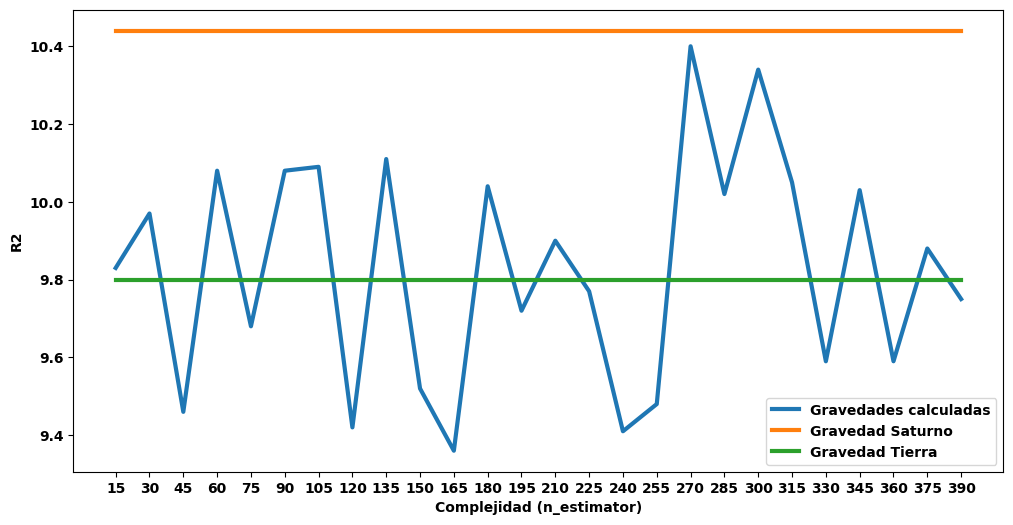

In [159]:

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(15,400,15)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_tree = RandomForestRegressor(n_estimators=hiper_param[i],
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=100)
    mod_tree.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_tree.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_tree.predict(X_test)) 
    oob_score[i] = mod_tree.oob_score_
print("El mejor valor de n_estimator podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))
g = grav_calculada[:26]
gravedad_tierra = []
gravedad_saturno = []
for i in g:
    gravedad_saturno.append(10.44)
    gravedad_tierra.append(9.8)

# Graficamos el R_cuadrado de training versus de test

plt.plot(hiper_param, g, linewidth=3, label='Gravedades calculadas')
plt.plot(hiper_param, gravedad_saturno, linewidth=3, label='Gravedad Saturno')
plt.plot(hiper_param, gravedad_tierra, linewidth=3, label='Gravedad Tierra')
"""plt.plot(hiper_param[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="max R^2")"""
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

In [141]:
## Solución
# Ejercicio 11.1.3
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test,mod_lr_predict))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, mod_lr_predict)*100)
print('Mean Squared Error:', mean_squared_error(y_test, mod_lr_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, mod_lr_predict)))
print('R^2 coefficient of determination:', r2_score(y_test, mod_lr_predict))

Mean Absolute Error: 0.07920406527430393
Mean Absolute Percentage Error: 0.7963168082609631
Mean Squared Error: 0.009592086345639074
Root Mean Squared Error: 0.09793919718702555
R^2 coefficient of determination: 0.9372035034942081


NameError: name 'gravidades_valores' is not defined